In [204]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime
from PIL import Image
from wordcloud import WordCloud
import seaborn as sns

In [205]:
%matplotlib inline

In [206]:
plt.rcParams['figure.figsize'] = (10, 10)

In [207]:
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

In [208]:
#importing data
df_rater = pd.read_excel("Ramen_Data.xlsx", sheet_name="The Ramen Rater - Big List Of A")
df_rater.head()





,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2700,Vedan,Jhen Mian Tang Spicy Hot Noodle,Pack,Taiwan,4,NaN
1,2699,Myojo,Chicken Shio Wanton Noodles,Bowl,Japan,4.5,NaN
2,2698,Nissin,Cup Noodles Chilli Crab Flavour (More Crabtastic),Cup,Singapore,4,NaN
3,2697,Maruchan,Bowl Taste Of Asia Hot & Spicy Kimchi Ramen Ra...,Bowl,United States,3.25,NaN
4,2696,Nongshim,Neoguri Spicy Seafood Noodle Soup,Cup,United States,5,NaN


In [209]:
def clean_up_stars(x):
    try :
        return float(x)
    except:
        return np.nan 
df_rater["cleanstars"]=df_rater.Stars.apply(clean_up_stars)
df_rater.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten,cleanstars
0,2700,Vedan,Jhen Mian Tang Spicy Hot Noodle,Pack,Taiwan,4,NaN,4.00
1,2699,Myojo,Chicken Shio Wanton Noodles,Bowl,Japan,4.5,NaN,4.50
2,2698,Nissin,Cup Noodles Chilli Crab Flavour (More Crabtastic),Cup,Singapore,4,NaN,4.00
3,2697,Maruchan,Bowl Taste Of Asia Hot & Spicy Kimchi Ramen Ra...,Bowl,United States,3.25,NaN,3.25
4,2696,Nongshim,Neoguri Spicy Seafood Noodle Soup,Cup,United States,5,NaN,5.00


In [210]:
df_raterC = df_rater.copy()
df_raterC.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten,cleanstars
0,2700,Vedan,Jhen Mian Tang Spicy Hot Noodle,Pack,Taiwan,4,NaN,4.00
1,2699,Myojo,Chicken Shio Wanton Noodles,Bowl,Japan,4.5,NaN,4.50
2,2698,Nissin,Cup Noodles Chilli Crab Flavour (More Crabtastic),Cup,Singapore,4,NaN,4.00
3,2697,Maruchan,Bowl Taste Of Asia Hot & Spicy Kimchi Ramen Ra...,Bowl,United States,3.25,NaN,3.25
4,2696,Nongshim,Neoguri Spicy Seafood Noodle Soup,Cup,United States,5,NaN,5.00


In [211]:
#finding data columns
df_rater.columns



Index(['Review #', 'Brand', 'Variety', 'Style', 'Country', 'Stars', 'Top Ten',
       'cleanstars'],
      dtype='object')

In [212]:
#finding data type
df_rater.columns


df_rater.dtypes


Review #        int64
Brand          object
Variety        object
Style          object
Country        object
Stars          object
Top Ten        object
cleanstars    float64
dtype: object

In [213]:
#value count of Brands
df_rater["Brand"].value_counts()

Nissin               399
Nongshim             103
Maruchan              81
Myojo                 72
Mama                  71
                    ... 
President              1
La Moderna             1
Tokachimen Koubou      1
Kimura                 1
Westbrae               1
Name: Brand, Length: 369, dtype: int64

In [214]:
#value count of Country
df_rater["Country"].value_counts()

Japan            381
United States    340
South Korea      326
Taiwan           229
Thailand         191
China            175
Malaysia         158
Hong Kong        144
Indonesia        141
Singapore        122
Vietnam          108
UK                69
Philippines       47
Canada            41
India             39
Germany           27
Mexico            25
Australia         22
Netherlands       15
Nepal             14
Myanmar           14
Pakistan           9
Hungary            9
Bangladesh         7
Colombia           6
Cambodia           5
Brazil             5
Poland             4
Holland            4
Fiji               4
Sarawak            3
Sweden             3
Finland            3
Dubai              3
Estonia            2
Nigeria            2
Ghana              2
Phlippines         1
Name: Country, dtype: int64

In [215]:
#value count of packaging style
type_ramen= df_rater["Style"].value_counts()

print(type_ramen)

Pack          1594
Bowl           514
Cup            470
Tray           111
Box              6
Restaurant       1
Can              1
Bar              1
Name: Style, dtype: int64


In [216]:
df_rater.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Review #    2700 non-null   int64  
 1   Brand       2700 non-null   object 
 2   Variety     2700 non-null   object 
 3   Style       2698 non-null   object 
 4   Country     2700 non-null   object 
 5   Stars       2700 non-null   object 
 6   Top Ten     41 non-null     object 
 7   cleanstars  2688 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 168.9+ KB


In [217]:
df_rater.drop('Top Ten', axis=1, inplace= True)


In [218]:
df_rater.drop('Review #', axis=1, inplace= True)

,Brand,Variety,Style,Country,Stars,cleanstars
0,Vedan,Jhen Mian Tang Spicy Hot Noodle,Pack,Taiwan,4,4.00
1,Myojo,Chicken Shio Wanton Noodles,Bowl,Japan,4.5,4.50
2,Nissin,Cup Noodles Chilli Crab Flavour (More Crabtastic),Cup,Singapore,4,4.00
3,Maruchan,Bowl Taste Of Asia Hot & Spicy Kimchi Ramen Ra...,Bowl,United States,3.25,3.25
4,Nongshim,Neoguri Spicy Seafood Noodle Soup,Cup,United States,5,5.00


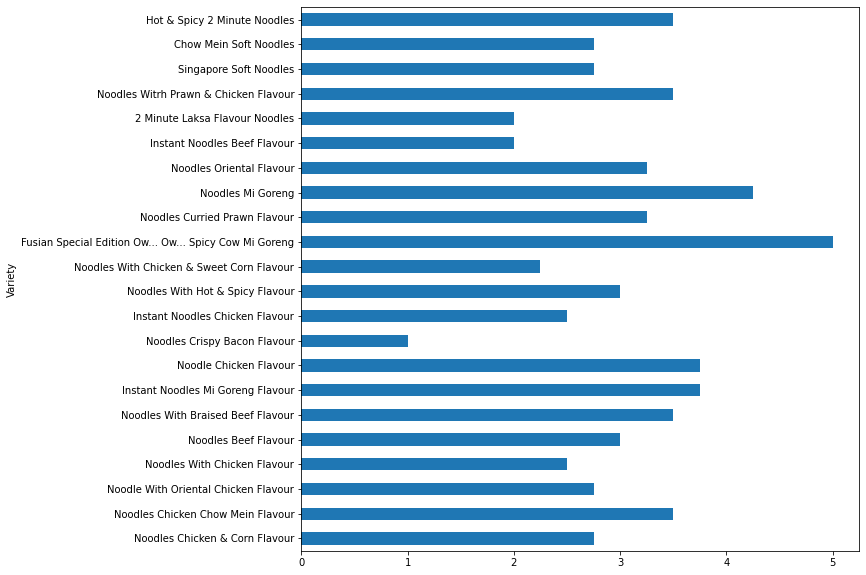

In [219]:
df_rater.set_index("Variety")[df_rater.set_index("Variety")["Country"] == "Australia"].cleanstars.plot(kind= "barh")
df_rater.head()

,Brand,Variety,Style,Country,Stars,cleanstars
0,Vedan,Jhen Mian Tang Spicy Hot Noodle,Pack,Taiwan,4,4.00
1,Myojo,Chicken Shio Wanton Noodles,Bowl,Japan,4.5,4.50
2,Nissin,Cup Noodles Chilli Crab Flavour (More Crabtastic),Cup,Singapore,4,4.00
3,Maruchan,Bowl Taste Of Asia Hot & Spicy Kimchi Ramen Ra...,Bowl,United States,3.25,3.25
4,Nongshim,Neoguri Spicy Seafood Noodle Soup,Cup,United States,5,5.00


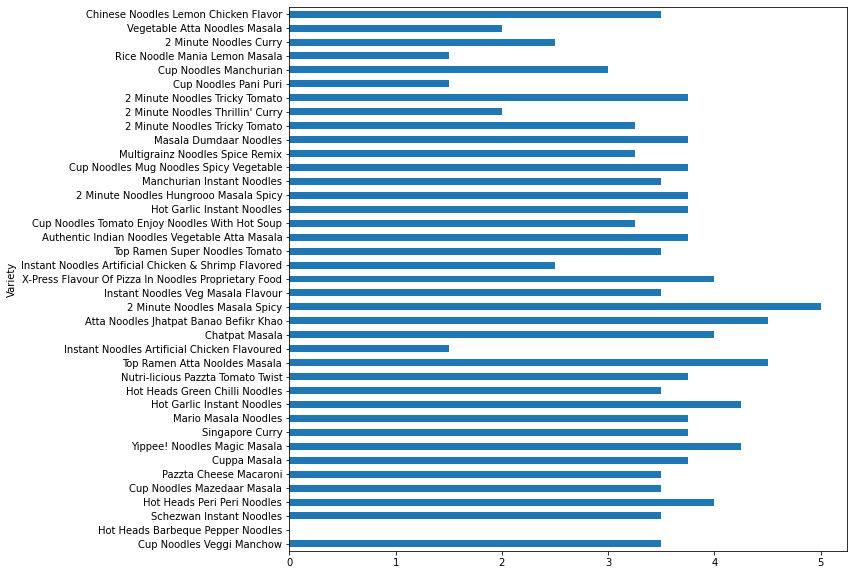

In [220]:
df_rater.set_index("Variety")[df_rater.set_index("Variety")["Country"] == "India"].cleanstars.plot(kind= "barh")
df_rater.head()

,Brand,Style,Country,Stars,cleanstars
Variety,,,,,
Liangpi (Shaanxik cold noodle),Qicaiyuan,Pack,China,4.25,4.25
Instant Noodle Artificial Spicy Hot Beef Flavor,JML,Pack,China,3.75,3.75
Kimchi Ramyun,Nongshim,Bowl,China,3.75,3.75
Authentic Snail Rice Noodle,Liu Quan,Bowl,China,3.25,3.25
Kamjatangmyun Potato Pork Flavour,Nongshim,Pack,China,4.75,4.75


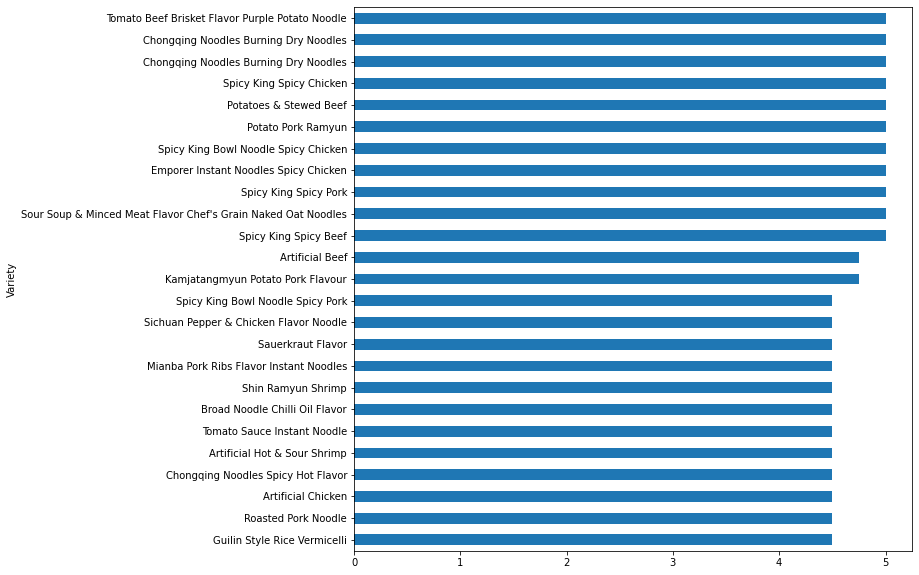

In [221]:
china= df_rater.set_index("Variety")[(df_rater.set_index("Variety")["Country"] == "China")]
china[(china.cleanstars >= 4.5 )].cleanstars.sort_values().plot(kind="barh")

china.head()

In [222]:
top_china = china("Star")

TypeError: 'DataFrame' object is not callable

,Brand,Variety,Style,Country,Stars
0,Vedan,Jhen Mian Tang Spicy Hot Noodle,Pack,Taiwan,4
1,Myojo,Chicken Shio Wanton Noodles,Bowl,Japan,4.5
2,Nissin,Cup Noodles Chilli Crab Flavour (More Crabtastic),Cup,Singapore,4
3,Maruchan,Bowl Taste Of Asia Hot & Spicy Kimchi Ramen Ra...,Bowl,United States,3.25
4,Nongshim,Neoguri Spicy Seafood Noodle Soup,Cup,United States,5


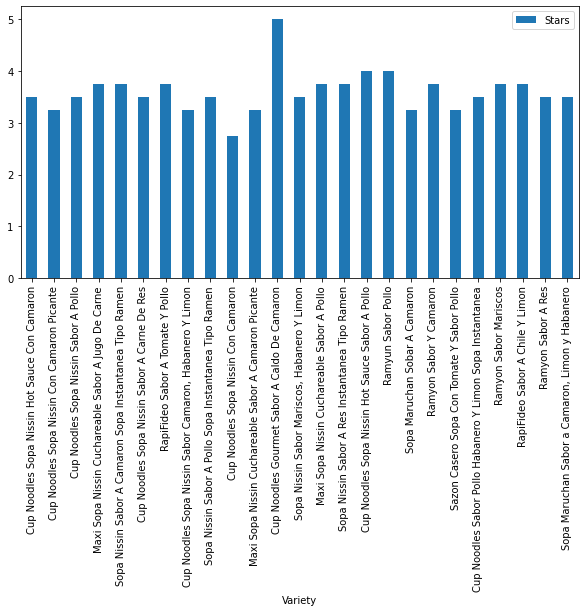

In [ ]:
df_rater.set_index("Variety")[df_rater.set_index("Variety")["Country"] == "Mexico"].plot(kind= "bar")
df_rater.head()

,Brand,Variety,Style,Country,Stars
0,Vedan,Jhen Mian Tang Spicy Hot Noodle,Pack,Taiwan,4
1,Myojo,Chicken Shio Wanton Noodles,Bowl,Japan,4.5
2,Nissin,Cup Noodles Chilli Crab Flavour (More Crabtastic),Cup,Singapore,4
3,Maruchan,Bowl Taste Of Asia Hot & Spicy Kimchi Ramen Ra...,Bowl,United States,3.25
4,Nongshim,Neoguri Spicy Seafood Noodle Soup,Cup,United States,5


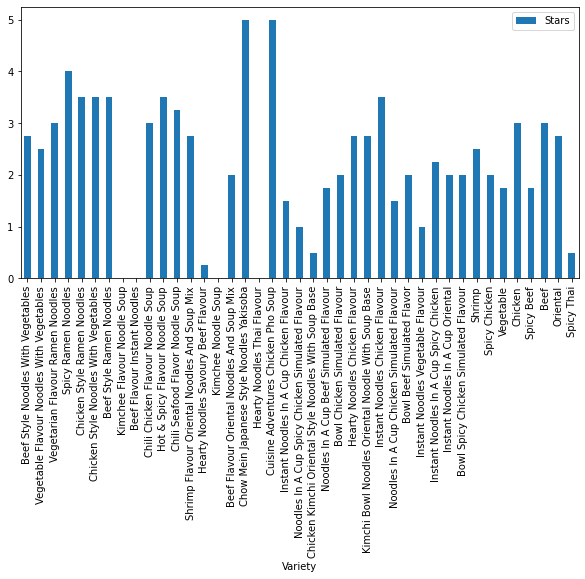

In [ ]:
df_rater.set_index("Variety")[df_rater.set_index("Variety")["Country"] == "Canada"].plot(kind= "bar")
df_rater.head()

In [ ]:
#WordCloud
Text = df_rater['Variety']
Text.head()



0                      Jhen Mian Tang Spicy Hot Noodle
1                          Chicken Shio Wanton Noodles
2    Cup Noodles Chilli Crab Flavour (More Crabtastic)
3    Bowl Taste Of Asia Hot & Spicy Kimchi Ramen Ra...
4                    Neoguri Spicy Seafood Noodle Soup
Name: Variety, dtype: object

In [ ]:
list_of_variety = Text.to_list()



In [ ]:
texts= list_of_variety[10]

texts=" ".join(review for review in list_of_variety)
print ("There are {} words in the combination of all reviewed ramen flavours.".format(len(texts)))

There are 82856 words in the combination of all reviewed ramen flavours.


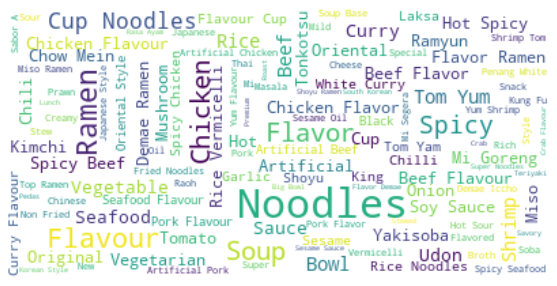

In [ ]:
wordcloud = WordCloud(background_color="white",margin=2, min_font_size= 5, max_font_size=30, max_words= 1000, min_word_length=0, stopwords=set(["Instant","Instant Noodle", "Noodle","With","Flvour"])).generate(texts)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
bowl_mask = np.array(Image.open("istockphoto-874666510-612x612.jpg"))
bowl_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [ ]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [ ]:
transformed_bowl_mask = np.ndarray((bowl_mask.shape[0], bowl_mask.shape[1]), np.int32)

for i in range (len(bowl_mask)):
    transformed_bowl_mask[i]= list(map(transform_format, bowl_mask[i]))

In [ ]:
transformed_bowl_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

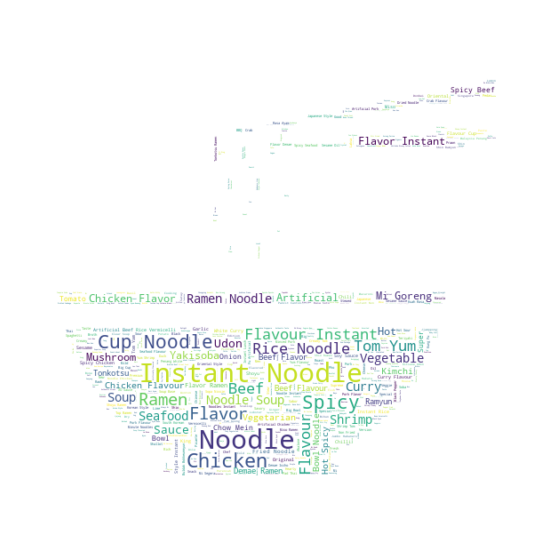

In [ ]:
wc = WordCloud(background_color="white", max_words=1000, min_font_size= 1, max_font_size=30, mask=transformed_bowl_mask)

wc.generate(texts)


wc.to_file("ramen.jpg")

plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation= "bilinear")
plt.axis("off")
plt.show()

In [ ]:
noodle_mask = np.array(Image.open("images (3).png"))
noodle_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
def transform_format (val):
    if val == 0:
        return 255
    else:
        return val

In [ ]:
transformed_noodle_mask = np.ndarray((noodle_mask.shape[0], noodle_mask.shape[1]), np.int32)

for i in range(len(noodle_mask)):
    transformed_noodle_mask[i] = list(map(transform_format, noodle_mask[i]))

In [ ]:
transformed_noodle_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

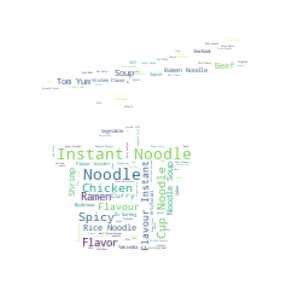

In [ ]:
wc = WordCloud(background_color="white", max_words=1000, min_font_size= 2, max_font_size=30, mask=transformed_noodle_mask, contour_color="red")

wc.generate(texts)

wc.to_file("images (1).png")

plt.figure(figsize=[5,5])
plt.imshow(wc, interpolation= "bilinear")
plt.axis("off")
plt.show()

In [ ]:
country = df_rater.groupby('Country')
country.nunique()




,Brand,Variety,Style,Stars
Country,,,,
Australia,5,22,2,11
Bangladesh,3,7,1,3
Brazil,1,5,2,4
Cambodia,2,5,1,3
Canada,9,41,3,15
China,34,162,4,21
Colombia,1,6,2,5
Dubai,1,3,1,2
Estonia,1,2,1,2


In [ ]:
tops = df_rater[[type(x)is str for x in df_rater["Country"]]]
Japan=tops[["Japan" in x for x in tops["Country"]]]
Japan

,Brand,Variety,Style,Country,Stars
1,Myojo,Chicken Shio Wanton Noodles,Bowl,Japan,4.5
10,Village Vanguard,No Men,Pack,Japan,4.25
13,Nissin,Yakisoba With Mayonnaise,Tray,Japan,5
14,Sapporo Ichiban,Coriander & Chicken Noodle,Cup,Japan,4.25
17,Nissin,Cup Noodles Champignons (Mushroom),Cup,Japan,3.5
...,...,...,...,...,...
2674,Nissin,Soba Noodles With Mayo Mustard Squirt,Pack,Japan,4
2675,Nissin,Demae Ramen Spicy Flavor,Pack,Japan,3
2676,Nissin,Demae Ramen Spicy Seafood With Chili Pepper,Pack,Japan,2
2687,Sapporo Ichiban,Chow Mein,Pack,Japan,5


In [ ]:
# Dataset 2 (Ramen Demands)
# 56 list of countries and their demands for ramen -> digits are in millions 

In [ ]:
df_demands =pd.read_excel("Ramen_Data.xlsx", sheet_name="Demands for Instant Noodles ")
df_demands.head()




,Countries/Region,2016,2017,2018,2019,2020
0,China,38520.0,38960.0,40250,41450,46350
1,Indonesia,13010.0,12620.0,12540,12520,12640
2,Viet Nam,4920.0,5060.0,5200,5430,7030
3,India,4270.0,5420.0,6060,6730,6730
4,Japan,5660.0,5660.0,5780,5630,5970


In [ ]:
df_demands.set_index("Countries/Region", inplace=True)


In [ ]:
df_demands.tail()

,2016,2017,2018,2019,2020
Countries/Region,,,,,
Finland,10.0,10.0,10,10,10
Switzerland,10.0,10.0,10,10,10
Argentina,10.0,10.0,10,10,4
Others,1070.0,1310.0,1010,860,800
Total,97520.0,100110.0,103620,106420,116560


In [ ]:
group_5 =df_demands.sample(3)
group_5.head()


,2016,2017,2018,2019,2020
Countries/Region,,,,,
Sri Lanka,NaN,NaN,170,180,180
Australia,380.0,390.0,410,420,440
Russia,1570.0,1780.0,1850,1910,2000


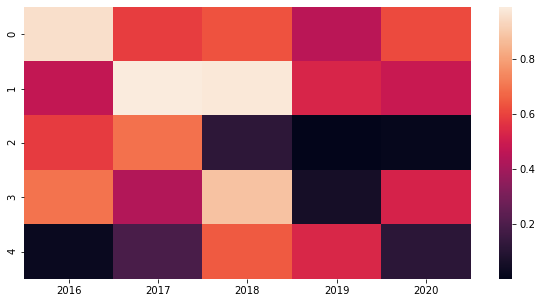

In [ ]:
# Create a dataset
df_demands = pd.DataFrame(np.random.random((5,5)), columns=["2016","2017","2018","2019","2020"], )

# Default heatmap
p1 = sns.heatmap(df_demands)